### Imports

In [1]:
#import twitter_credentials as cred
import tweepy as tw
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib notebook
import collections

### Getting Authentication

In [2]:
auth = tw.OAuthHandler(cred.CONSUMER_KEY, cred.CONSUMER_SECRET)
auth.set_access_token(cred.ACCESS_TOKEN, cred.ACCESS_TOKEN_SECRET)
api = tw.API(auth)

### Defining the accounts

In [3]:
# Getting the SpaceX user
SpaceX = api.get_user('SpaceX')

# Getting the blueorigin user
blueorigin = api.get_user('blueorigin')

# Getting the virgingalactic user
virgingalactic = api.get_user('virgingalactic')

### Getting the Friend's ID's

In [4]:
# Creating a list of id's that are followed by SpaceX 
SpaceX_following_id = [i for i in tw.Cursor(api.friends_ids, 'SpaceX').items()]

# Creating a list of id's that are followed by blueorigin 
blueorigin_following_id = [i for i in tw.Cursor(api.friends_ids, 'blueorigin').items()]

# Creating a list of id's that are followed by virgingalactic 
virgingalactic_following_id = [i for i in tw.Cursor(api.friends_ids, 'virgingalactic').items()]

### Finding the Common Friends for all the Companies

In [5]:
# Creating a list of id's that are followed by all the three accounts (SpaceX, blueorigin, virgingalactic)
common_ids = [i for i in SpaceX_following_id if i in virgingalactic_following_id and i in blueorigin_following_id] 

# Getting the Screen Names of all the common_ids
common_screen_name = [api.get_user(i).screen_name for i in common_ids]

# Creating a list of common id's that are followed by SpaceX, blueorigin
common_space_blue = [i for i in SpaceX_following_id if i in blueorigin_following_id]

# Creating a list of common id's that are followed by blueorigin, virgingalactic
common_blue_virgin = [i for i in blueorigin_following_id if i in virgingalactic_following_id]

# Creating a list of common id's that are followed by virgingalactic, SpaceX
common_virgin_space = [i for i in virgingalactic_following_id if i in SpaceX_following_id]

### Creating the graph for SpaceX and its friend's

<IPython.core.display.Javascript object>


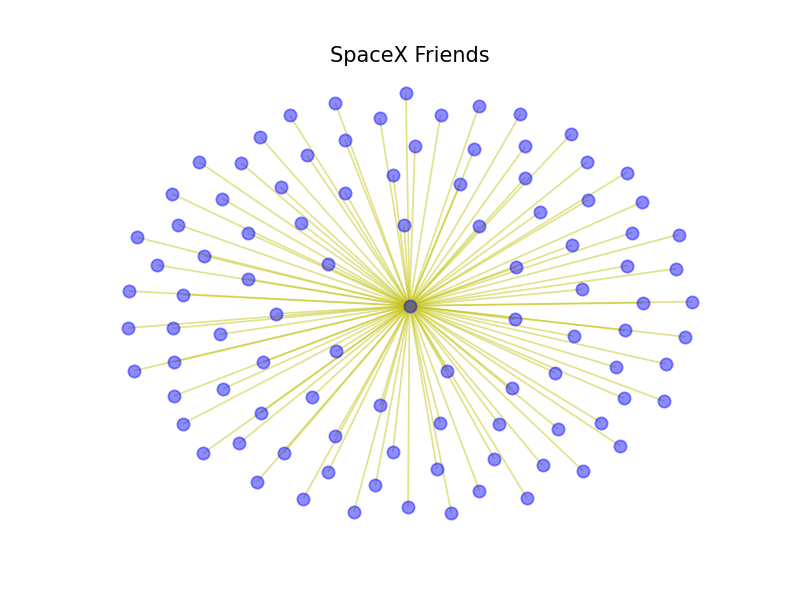

In [6]:
# Creating a Graph for SpaceX
Graph_spacex = nx.Graph()

# Adding the edges to the Graph_spacex
for j in SpaceX_following_id:
    Graph_spacex.add_edge(SpaceX.id, j)    

# Plotting the Graph
plt.figure("SpaceX Friends")
plt.title("SpaceX Friends")
plt_space = nx.draw(Graph_spacex, label=False, node_size = 50, alpha = 0.45, width = 1.0, edge_color = 'y', node_color='b')
# plt.savefig('SpaceX_Friends.png')

### Creating the graph for BlueOrigin and its friend's

<IPython.core.display.Javascript object>


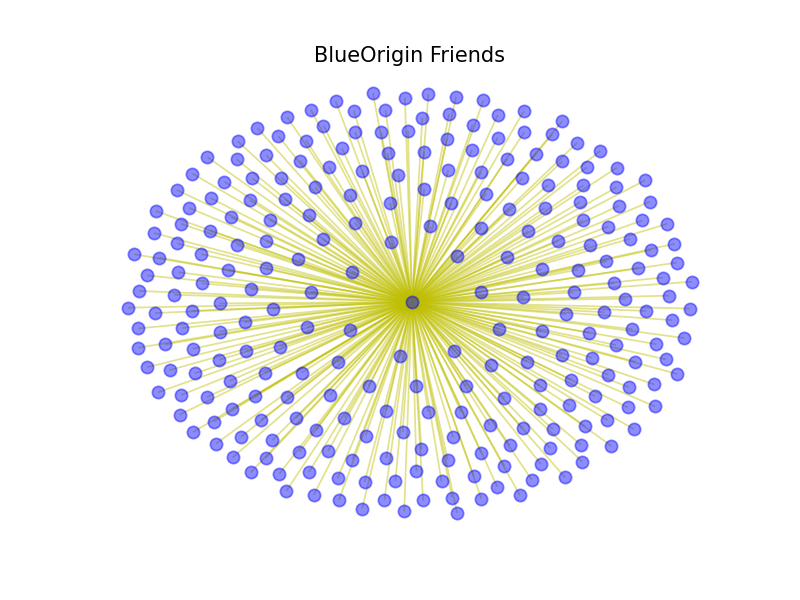

In [7]:
# Creating a Graph for blueorigin
Graph_blueorigin = nx.Graph()

# Adding the edges to the Graph_blueorigin
for i in blueorigin_following_id:
    Graph_blueorigin.add_edge(blueorigin.id, i)    

# Plotting the Graph
plt.figure("BlueOrigin Friends")
plt.title("BlueOrigin Friends")

plt_blueorigin = nx.draw(Graph_blueorigin, label=False, node_size = 50, alpha = 0.45, width = 1.0, edge_color = 'y', node_color='b')
# plt.savefig('BlueOrigin_Friends.png')

### Creating the graph for Virgin Galactic and its friend's

<IPython.core.display.Javascript object>


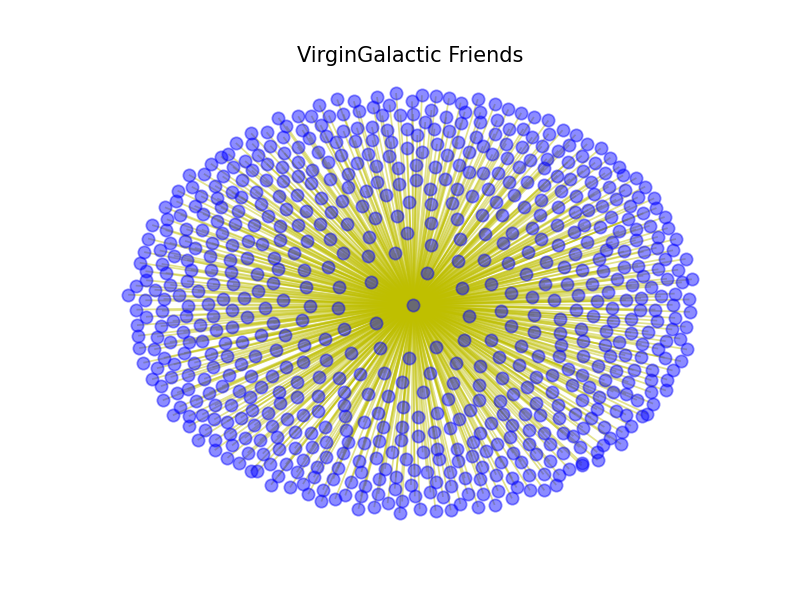

In [8]:
# Creating a Graph for virgingalactic
Graph_virgingalactic = nx.Graph()

# Adding the edges to the Graph_virgingalactic
for i in virgingalactic_following_id:
    Graph_virgingalactic.add_edge(virgingalactic.id, i)    

# Plotting the Graph
plt.figure("VirginGalactic Friends")
plt.title("VirginGalactic Friends")
plt_virgingalactic = nx.draw(Graph_virgingalactic, label=False, node_size = 50, alpha = 0.45, width = 1.0, edge_color = 'y', node_color='b')
# plt.savefig('VirginGalactic_Friends.png')

### Creating the graph of all three companies

In [9]:
# Creating a Main Graph
G_main = nx.Graph()

# Adding edges from common_ids to SpaceX
for i in common_ids:
    G_main.add_edge(SpaceX.id, i,color='r')

# Adding edges from common_ids to virgingalactic
for i in common_ids:
    G_main.add_edge(virgingalactic.id, i,color='b')

# Adding edges from common_ids to blueorigin    
for i in common_ids:
    G_main.add_edge(blueorigin.id, i,color='g')

# Adding edges from SpaceX to its Friends
for i in SpaceX_following_id:
    if i not in common_space_blue and i not in common_virgin_space:
        G_main.add_edge(SpaceX.id, i, color='y')

# Adding edges from virgingalactic to its Friends
for i in virgingalactic_following_id:
    if i not in common_blue_virgin and i not in common_virgin_space:
        G_main.add_edge(virgingalactic.id, i, color='y')

# Adding edges from blueorigin to its Friends
for i in blueorigin_following_id:
    if i not in common_space_blue and i not in common_blue_virgin:
        G_main.add_edge(blueorigin.id, i, color='y')


### Plotting the Graph

<IPython.core.display.Javascript object>


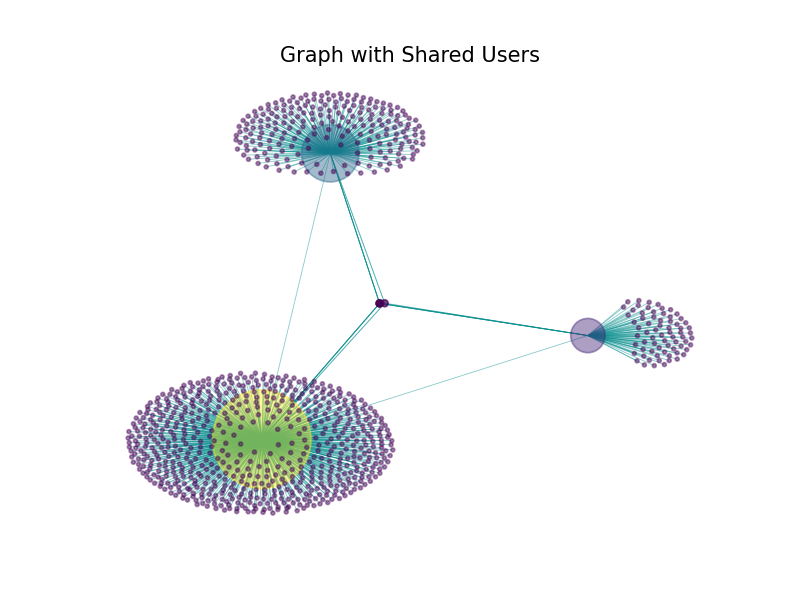

In [10]:
# Calculating the degree of all the Nodes
degree = dict(nx.degree(G_main))

# Creating a array of colors based on the degree of the nodes in the Graph
n_color = np.asarray([degree[n] for n in G_main.nodes()])

# Creating an array for the size of the node to display in the graph
node_size = [i * 5 for i in degree.values()]

# Plotting the Graph
colors = nx.get_edge_attributes(G_main,'color').values()
plt.figure("Graph with Shared Users")
plt.title("Graph with Shared Users")
plt_maingraph = nx.draw(G_main, pos=nx.spring_layout(G_main), node_color=n_color, node_size = node_size, alpha = 0.45, cmap='viridis', width = 0.5, edge_color = 'darkcyan')
plt.show()
# plt.savefig('Graph_with_Shared_Users.png')

### Calculating the Degree Distribution and Plotting the Histogram

Counter({1: 917, 3: 7, 646: 1, 218: 1, 78: 1})


<IPython.core.display.Javascript object>


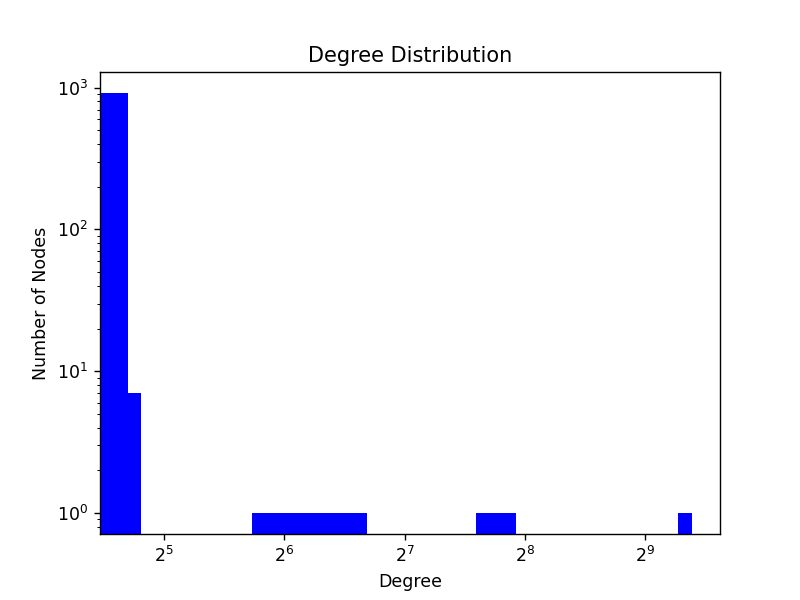

In [11]:
# Creating a degree sequence
degree_sequence = sorted([d for n, d in G_main.degree()], reverse=True)  # degree sequence

# Calculating number of nodes with each degree
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)

# Creating a barplot for degrees
deg, cnt = zip(*degreeCount.items())
# fig, ax = plt.subplots()
plt.figure("Degree Distribution")
plt.bar(deg, cnt, width=50, color="b")
plt.yscale('log')
plt.xscale('log', base=2)
plt.title("Degree Distribution")
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
# plt.savefig('Degree Distribution.png')
plt.show()

### Calculating the Degree Centrality

In [12]:
# Calculating the Degree Centrality for the graph "G_main"
Degree_Centrality = nx.degree_centrality(G_main)

# Finding the node with highest degree centrality
max_degree_centrality_sc = api.get_user(max(Degree_Centrality, key=Degree_Centrality.get)).screen_name
print("The Node with highest Degree Centrality is : '", max_degree_centrality_sc, "' with the value : '", max(Degree_Centrality.values()), "'")

The Node with highest Degree Centrality is : ' virgingalactic ' with the value : ' 0.6976241900647948 '


### Calculating the Closeness Centrality

In [13]:
# Calculating the Closeness Centrality for the graph "G_main"
Closeness_Centrality = nx.closeness_centrality(G_main)

# Finding the node with highest closeness centrality
max_closeness_centrality_sc = api.get_user(max(Closeness_Centrality, key=Closeness_Centrality.get)).screen_name
print("The Node with highest Closeness Centrality is : '", max_closeness_centrality_sc, "' with the value : '", max(Closeness_Centrality.values()), "'")

The Node with highest Closeness Centrality is : ' virgingalactic ' with the value : ' 0.7678275290215588 '


### Calculating the Betweenness Centrality

In [14]:
# Calculating the Betweenness Centrality for the graph "G_main"
Betweenness_Centrality = nx.betweenness_centrality(G_main, normalized = True, endpoints = False)

# Finding the node with highest betweenness centrality
max_betweenness_centrality_sc = api.get_user(max(Betweenness_Centrality, key=Betweenness_Centrality.get)).screen_name
print("The Node with highest Betweenness Centrality is : '", max_betweenness_centrality_sc, "' with the value : '", max(Betweenness_Centrality.values()), "'")

The Node with highest Betweenness Centrality is : ' virgingalactic ' with the value : ' 0.9072176171852198 '


### Calculating the Page Rank

In [15]:
# Calculating the Page Rank for the graph "G_main"
Page_Rank = nx.pagerank(G_main, alpha = 0.8) 

# Finding the node with highest Page Rank
max_page_rank_sc = api.get_user(max(Page_Rank, key=Page_Rank.get)).screen_name
print("The Node with highest Page Rank is : '", max_page_rank_sc, "' with the value : '", max(Page_Rank.values()), "'")

The Node with highest Page Rank is : ' virgingalactic ' with the value : ' 0.30725528448682704 '
